In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
import Function as f

In [2]:
max_iteration = 10000
weight_decay = 1e-5
NUM_EMPLOYEES = 10500
NUM_TRAIN = 10000
NUM_VAL = 500
Epsilons = [10, 10]
NUM_FEATURES = 3

In [3]:
X, Y, survival_times = f.Generating_Synthetic_Set(NUM_EMPLOYEES, NUM_FEATURES, Epsilons, bias = True)

In [4]:
X_train = X[:NUM_TRAIN]
X_val = X[NUM_TRAIN:]
Y_train = Y[:NUM_TRAIN]
Y_val = Y[NUM_TRAIN:]

In [5]:
# intialization
NUM_TASKS = int(max(survival_times))
loss_list = []
W = np.zeros((NUM_FEATURES + 1, NUM_TASKS))
W[-1] += 1
dL1_W = np.zeros(W.shape)

In [6]:
# start the loop
for t in range(1, max_iteration + 1):

    # W, loss_list = f.Non_Kernel_Pegasos(10, X_train, W, Y_train, loss_list, t, weight_decay)
    W = f.Split_Non_Kernel_Pegasos(10, X_train, W, Y_train, loss_list, t, weight_decay)
    if t % 5 == 0:
        Y_pred_tr = np.sign(X_train.dot(W))
        Y_pred_val = np.sign(X_val.dot(W))
        acc_tr = np.sum(Y_pred_tr * Y_train > 0) / (Y_pred_tr.size)
        acc_val = np.sum(Y_pred_val * Y_val > 0) / (Y_pred_val.size)
        print(acc_tr, acc_val)
        # print('Iteration {}:{:.2f}, loss = {},'.format(t, acc, loss_list[-1]))
        # print('Iteration {}:{:.2f}, loss = {}, #violations = {}'.format(iter_times, acc, loss, num_violates))

1
2
3
4
5
0.9479104812834225 0.945463101604278
6
7
8
9
10
0.9021004278074867 0.8911529411764706
11
12
13
14
15
0.9415480213903743 0.9363508021390374
16
17
18
19
20
0.9478926203208556 0.9499208556149733
21
22
23
24
25
0.9529260962566845 0.9537818181818182
26
27
28
29
30
0.8552979679144385 0.8491786096256685
31
32
33
34
35
0.9517313368983957 0.9478352941176471
36
37
38
39
40
0.9290858823529412 0.924536898395722
41
42
43
44
45
0.9495952941176471 0.9490331550802139
46
47
48
49
50
0.9547110160427807 0.9527272727272728
51
52
53
54
55
0.8946096256684491 0.894068449197861
56
57
58
59
60
0.9527747593582888 0.9520149732620321
61
62
63
64
65
0.94678 0.9470203208556149
66
67
68
69
70
0.9419337967914438 0.9440042780748663
71
72
73
74
75
0.9534793582887701 0.950496256684492
76
77
78
79
80
0.9506119786096257 0.9494844919786096
81
82
83
84
85
0.9329341176470588 0.9268577540106951
86
87
88
89
90
0.9477564705882353 0.9447743315508021
91
92
93
94
95
0.9439885561497326 0.9420791443850267
96
97
98
99
100
0

KeyboardInterrupt: 

In [10]:
Y_pred = X.dot(W)
predict_age = f.Ages(Y_pred)
# print(predict_ages)
c_index = f.Calculate_C_index(survival_times[NUM_TRAIN:], predict_age[NUM_TRAIN:])
print(c_index)

0.21695740495921065


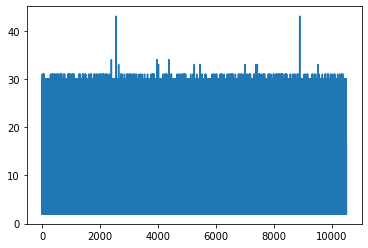

In [8]:
x_axis = range(len(predict_ages))
plt.plot(x_axis, predict_ages)

(0, 100)

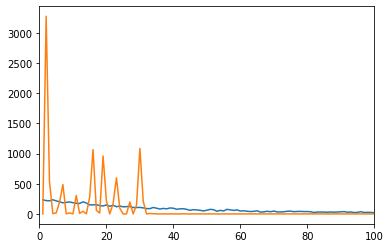

In [18]:
x_axis = np.arange(NUM_TASKS)+1 # the x axis
y_train_gt_axis = np.zeros(NUM_TASKS) # the ground truth train axis
y_val_gt_axis = np.zeros(NUM_TASKS) # the groud truth validation axis 
y_train_predict_axis = np.zeros(NUM_TASKS) # the predict train axis 
y_val_predict_axis = np.zeros(NUM_TASKS) # the predict validation axis 

for i in range(NUM_TASKS):
    y_train_gt_axis[i] = np.sum(survival_times[:NUM_TRAIN] == x_axis[i])
    y_val_gt_axis[i] = np.sum(survival_times[NUM_TRAIN:] == x_axis[i])
    y_train_predict_axis[i] = np.sum(predict_age[:NUM_TRAIN] == x_axis[i])
    y_val_predict_axis[i] = np.sum(predict_age[NUM_TRAIN:] == x_axis[i])
# plt.boxplot(y_train_gt_axis)


# print(y_train_gt_axis,y_train_predict_axis)
plt.plot(x_axis, y_train_gt_axis, x_axis, y_train_predict_axis) # the training set: ground truth vs predict situation
plt.xlim(0,100)
# plt.plot(x_axis, y_val_gt_axis, x_axis, y_val_predict_axis) # the valiadtion set: ground truth vs predictsituation
# plt.plot(x_axis, y_val_predict_axis)
# plt.plot(x_axis,y_train_predict_axis,y_val_predict_axis)